# TSF - Graduate Rotational Internship Program (Oct '21)

## Data Science and Business Analytics Internship

### Name: Prateek Goel

### Task 2 - Prediction using Unsupervised ML

### Predicting the optimum number of clusters from the 'Iris' dataset

# Step 1: Importing the necessary libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings("ignore")

# Step 2 : Datasets

In [23]:
data = pd.read_csv("iris.csv")

In [24]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [25]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [26]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Step 3: Data Analysis

#### 1. Sepal Length (in cm) for each Species 

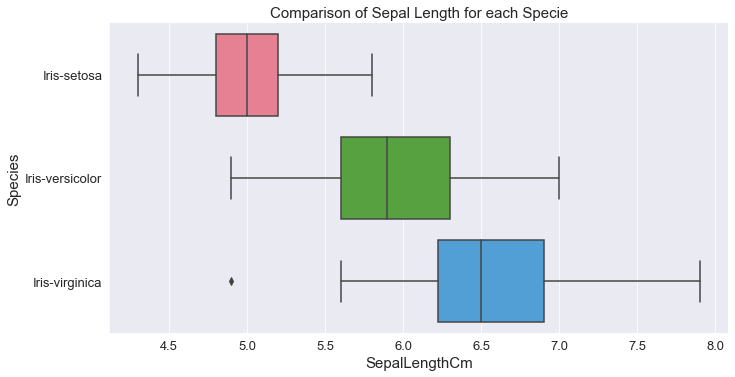

In [27]:
sns.catplot(x = "SepalLengthCm", y = "Species", data = data, kind = "box", height = 5, aspect = 2, palette = "husl")
plt.xlabel("SepalLengthCm", size = 15)
plt.ylabel("Species", size = 15)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.title("Comparison of Sepal Length for each Specie", size = 15)
sns.set_style("darkgrid")

#### 2. Sepal Width (in cm) for each Species

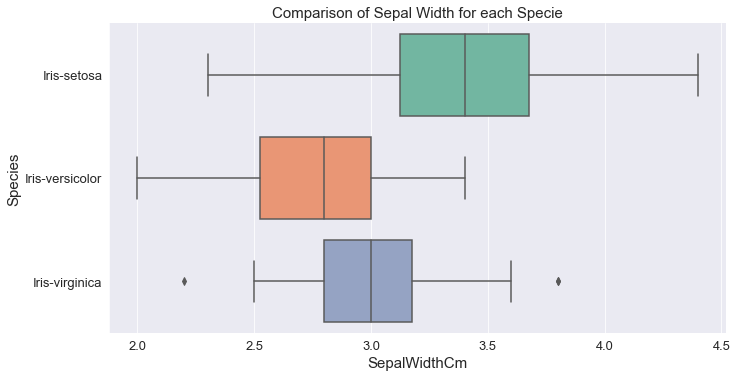

In [28]:
sns.catplot(x = "SepalWidthCm", y = "Species", data = data, kind = "box", height = 5, aspect = 2, palette = "Set2")
plt.xlabel("SepalWidthCm", size = 15)
plt.ylabel("Species", size = 15)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.title("Comparison of Sepal Width for each Specie", size = 15)
sns.set_style("darkgrid")

#### 3. Petal length (in cm) for each Species

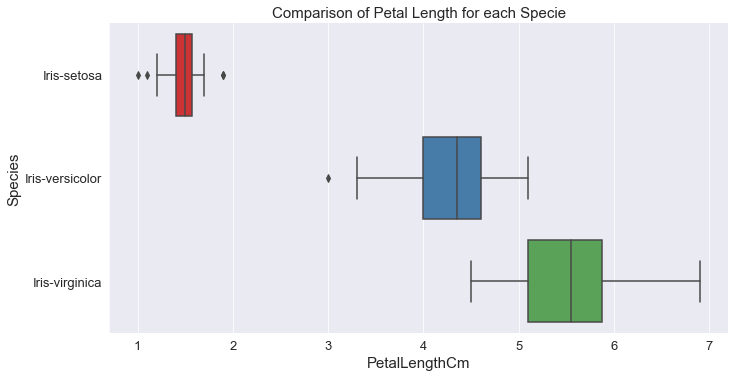

In [29]:
sns.catplot(x = "PetalLengthCm", y = "Species", data = data, kind = "box", height = 5, aspect = 2, palette = "Set1")
plt.xlabel("PetalLengthCm", size = 15)
plt.ylabel("Species", size = 15)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.title("Comparison of Petal Length for each Specie", size = 15)
sns.set_style("darkgrid")

#### 4. Petal width (in cm) for each Species

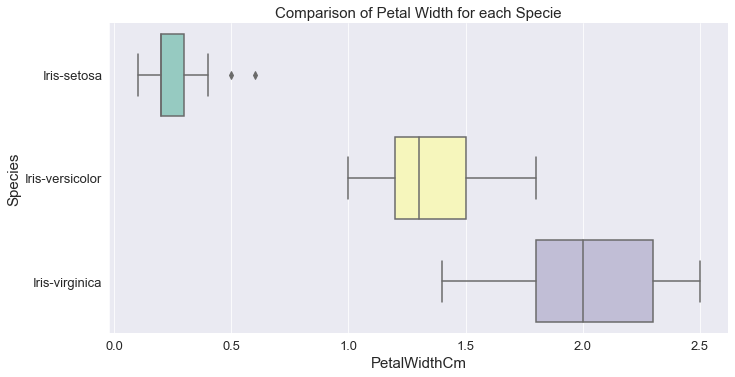

In [30]:
sns.catplot(x = "PetalWidthCm", y = "Species", data = data, kind = "box", height = 5, aspect = 2, palette = "Set3")
plt.xlabel("PetalWidthCm", size = 15)
plt.ylabel("Species", size = 15)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.title("Comparison of Petal Width for each Specie", size = 15)
sns.set_style("darkgrid")

# Step 4: Finding the optimum number of clusters

In [35]:
cols = data.iloc[:,[1,2,3,4]].values
WCSS = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(cols)
    WCSS.append(kmeans.inertia_)

Plotting the cluster data onto a line plot

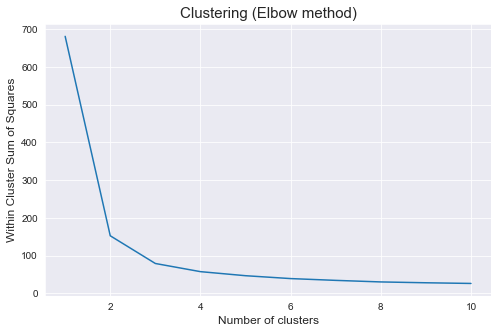

In [36]:
plt.figure(figsize = [8,5])
plt.plot(range(1,11), WCSS)
plt.xlabel('Number of clusters', size = 12)
plt.ylabel('Within Cluster Sum of Squares', size = 12)
plt.title('Clustering (Elbow method)', size = 15)
plt.show()

In [38]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(cols)

We can now visualize the clusters

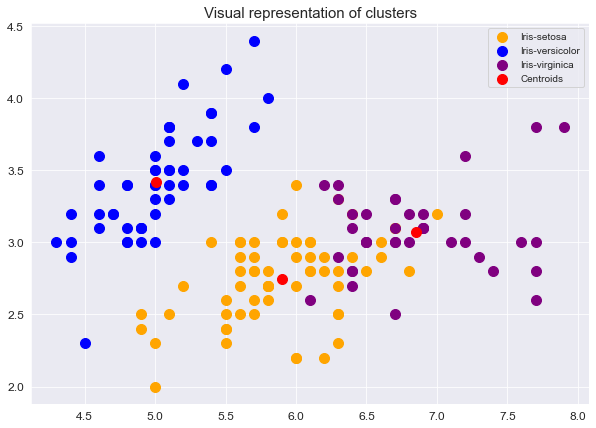

In [41]:
plt.figure(figsize = (10,7))
plt.scatter(cols[y_kmeans == 0, 0], cols[y_kmeans == 0,1], s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(cols[y_kmeans == 1, 0], cols[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Iris-versicolor')
plt.scatter(cols[y_kmeans == 2, 0], cols[y_kmeans == 2,1], s = 100, c = 'purple', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.title('Visual representation of clusters', size = 15)
plt.show()

# Thank You...